In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter as c # return counts
import seaborn as sns #used for data Visualization
import matplotlib.pyplot as plt
#import missingno as msno #finding missing values
from sklearn.model_selection import train_test_split #splits data in random train and test array
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error#model performance
import pickle #Python object hierarchy is converted into a byte stream,
from sklearn.linear_model import LinearRegression #Regresssion ML algorithm

In [3]:
data = pd.read_csv('Indicators.csv')
data.shape

(5656458, 6)

In [4]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [5]:
data.Value.round(2)

0              133.56
1               87.80
2                6.63
3               81.02
4          3000000.00
              ...    
5656453         36.00
5656454         90.00
5656455        242.00
5656456          3.30
5656457         32.80
Name: Value, Length: 5656458, dtype: float64

In [6]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

In [7]:
# How many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

In [8]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [9]:
# How many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

In [10]:
print(min(years)," to ",max(years))

1960  to  2015


In [11]:
# select CO2 emissions for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
stage = data[mask1 & mask2]


In [12]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


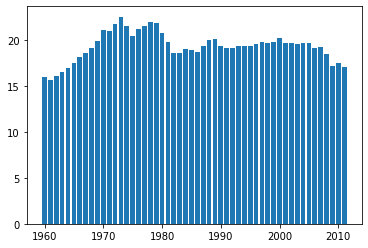

In [13]:
# get the years
years = stage['Year'].values
# get the values 

co2 = stage['Value'].values

# create
plt.bar(years,co2)
plt.show()

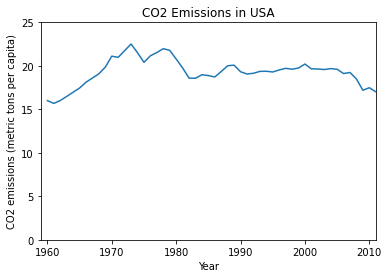

In [14]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('CO2 Emissions in USA')

# to make more honest, start they y axis at 0
plt.axis([1959, 2011,0,25])
#plt.plot(stage['Year'].values, stage['Value'].values)

plt.show()

In [15]:
# If we want to just include those within one standard deviation fo the mean, we could do the following
# lower = stage['Value'].mean() - stage['Value'].std()
# upper = stage['Value'].mean() + stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ]

# Otherwise, let's look at all the data
hist_data = stage['Value'].values

In [16]:
print(len(hist_data))

52


AttributeError: 'Rectangle' object has no property 'normed'

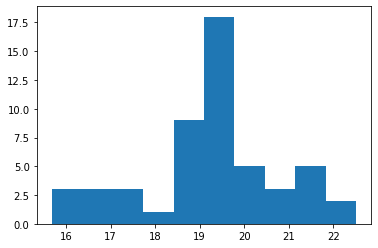

In [18]:
# the histogram of the data
plt.hist(hist_data, 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

In [19]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


For how many countries do we have CO2 per capita emissions data in 2011

In [20]:
print(len(co2_2011))

232


AttributeError: 'Rectangle' object has no property 'normed'

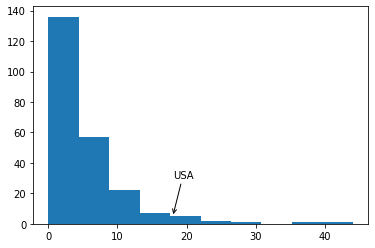

In [21]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

So the USA, at ~18 CO2 emissions (metric tons per capital) is quite high among all countries.

An interesting next step, which we'll save for you, would be to explore how this relates to other industrialized nations and to look at the outliers with those values in the 40s!

### Relationship between GDP and CO2 Emissions in USA

In [22]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [23]:
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685
105760,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,16749.789436
134798,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,17476.822248


In [24]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


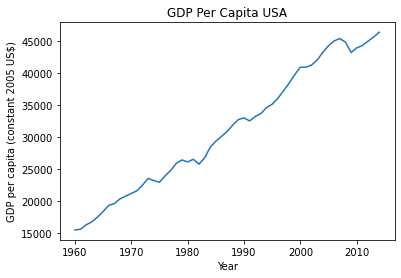

In [25]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita

### ScatterPlot for comparing GDP against CO2 emissions (per capita)

First, we'll need to make sure we're looking at the same time frames

In [26]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actually required by scatterplot)

In [27]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


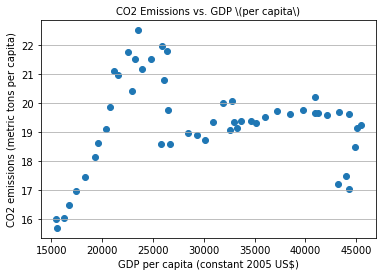

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[10],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

This doesn't look like a strong relationship.  We can test this by looking at correlation.

In [29]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

In [30]:
data.info() #info will give you a summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [31]:
data.describe()  # returns important values for continous column data

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


In [32]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([1, 1, 4], dtype=int64))

In [33]:
cat=data.dtypes[data.dtypes=='O'].index.values
cat

array(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'],
      dtype=object)

In [34]:
for i in cat:
    print("Column :",i)
    print('count of classes : ',data[i].nunique())
    print(c(data[i]))
    print('*'*120)

Column : CountryName
count of classes :  247
Counter({'Mexico': 37244, 'Colombia': 37227, 'Philippines': 36912, 'Peru': 36815, 'Costa Rica': 36457, 'Thailand': 36355, 'Morocco': 36275, 'Indonesia': 36252, 'Malaysia': 35874, 'Turkey': 35819, 'Ecuador': 35788, 'Pakistan': 35768, 'India': 35721, 'Brazil': 35550, 'Egypt, Arab Rep.': 35367, 'Bolivia': 35307, 'Tunisia': 35302, 'Honduras': 35171, 'Guatemala': 35078, 'El Salvador': 34739, 'Kenya': 34621, 'Algeria': 34578, 'Cameroon': 34259, 'Dominican Republic': 34253, 'Jordan': 34050, 'Senegal': 33990, 'Panama': 33984, 'Nicaragua': 33638, 'Bangladesh': 33386, 'Sri Lanka': 33369, 'Togo': 33221, 'Iran, Islamic Rep.': 32966, 'Benin': 32965, 'Zambia': 32930, 'Madagascar': 32637, 'Burkina Faso': 32604, 'Congo, Rep.': 32310, 'Mauritius': 32285, 'Botswana': 32039, 'Jamaica': 31835, 'Rwanda': 31770, 'Ghana': 31730, 'Paraguay': 31423, 'Uganda': 31412, 'Nigeria': 31381, 'Congo, Dem. Rep.': 31257, 'Sudan': 31175, 'Latin America & Caribbean (developing o

count of classes :  1344
Counter({'Population, total': 13484, 'Population growth (annual %)': 13442, 'Rural population (% of total population)': 13415, 'Urban population (% of total)': 13415, 'Rural population': 13374, 'Urban population': 13374, 'Urban population growth (annual %)': 13337, 'Surface area (sq. km)': 13090, 'Land area (sq. km)': 13086, 'Rural population growth (annual %)': 13061, 'Population density (people per sq. km of land area)': 12988, 'Death rate, crude (per 1,000 people)': 12486, 'Adolescent fertility rate (births per 1,000 women ages 15-19)': 12485, 'Birth rate, crude (per 1,000 people)': 12485, 'Population ages 65 and above (% of total)': 12426, 'Population, ages 0-14 (% of total)': 12426, 'Population, ages 15-64 (% of total)': 12426, 'Population, female (% of total)': 12426, 'Age dependency ratio (% of working-age population)': 12423, 'Age dependency ratio, old (% of working-age population)': 12423, 'Age dependency ratio, young (% of working-age population)': 12

count of classes :  1344
Counter({'SP.POP.TOTL': 13484, 'SP.POP.GROW': 13442, 'SP.RUR.TOTL.ZS': 13415, 'SP.URB.TOTL.IN.ZS': 13415, 'SP.RUR.TOTL': 13374, 'SP.URB.TOTL': 13374, 'SP.URB.GROW': 13337, 'AG.SRF.TOTL.K2': 13090, 'AG.LND.TOTL.K2': 13086, 'SP.RUR.TOTL.ZG': 13061, 'EN.POP.DNST': 12988, 'SP.DYN.CDRT.IN': 12486, 'SP.ADO.TFRT': 12485, 'SP.DYN.CBRT.IN': 12485, 'SP.POP.65UP.TO.ZS': 12426, 'SP.POP.0014.TO.ZS': 12426, 'SP.POP.1564.TO.ZS': 12426, 'SP.POP.TOTL.FE.ZS': 12426, 'SP.POP.DPND': 12423, 'SP.POP.DPND.OL': 12423, 'SP.POP.DPND.YG': 12423, 'SP.DYN.LE00.FE.IN': 12304, 'SP.DYN.LE00.MA.IN': 12304, 'SP.DYN.LE00.IN': 12304, 'SP.DYN.TFRT.IN': 12266, 'SP.DYN.TO65.FE.ZS': 12258, 'SP.DYN.TO65.MA.ZS': 12258, 'SP.DYN.AMRT.FE': 11939, 'SP.DYN.AMRT.MA': 11939, 'AG.LND.AGRI.K2': 11751, 'AG.PRD.FOOD.XD': 11669, 'AG.LND.AGRI.ZS': 11645, 'AG.PRD.LVSK.XD': 11626, 'AG.LND.ARBL.ZS': 11568, 'AG.PRD.CROP.XD': 11563, 'AG.LND.ARBL.HA.PC': 11545, 'TX.VAL.MRCH.CD.WT': 11248, 'SP.DYN.IMRT.IN': 11201, 'SH.DYN

In [35]:
data.dtypes[data.dtypes!='O'].index.values

array(['Year', 'Value'], dtype=object)

In [36]:
data.isnull().any()#it will return true if any columns is having null values

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

In [37]:
data.isnull().sum() #used for finding the null values

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64

In [38]:
data=data[data['CountryCode'].str.contains("USA|SGP|IND|ARB|BRB")]

In [39]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [40]:
data1=data.copy()
from sklearn.preprocessing import LabelEncoder #imorting the LabelEncoding from sklearn
x='*'
for i in cat:#looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()#creating an object of LabelEncoder
    print(c(data[i])) #getting the classes values before transformation
    data[i] = LE.fit_transform(data[i]) # trannsforming our text classes to numerical values
    print(c(data[i])) #getting the classes values after transformation
    print(x*100)

LABEL ENCODING OF: CountryName
Counter({'India': 35721, 'United States': 24425, 'Singapore': 22600, 'Barbados': 17611, 'Arab World': 17115})
Counter({2: 35721, 4: 24425, 3: 22600, 1: 17611, 0: 17115})
****************************************************************************************************
LABEL ENCODING OF: CountryCode
Counter({'IND': 35721, 'USA': 24425, 'SGP': 22600, 'BRB': 17611, 'ARB': 17115})
Counter({2: 35721, 4: 24425, 3: 22600, 1: 17611, 0: 17115})
****************************************************************************************************
LABEL ENCODING OF: IndicatorName
Counter({'Mortality rate, infant (per 1,000 live births)': 280, 'Mortality rate, under-5 (per 1,000)': 280, 'Adolescent fertility rate (births per 1,000 women ages 15-19)': 275, 'Age dependency ratio (% of working-age population)': 275, 'Age dependency ratio, old (% of working-age population)': 275, 'Age dependency ratio, young (% of working-age population)': 275, 'Merchandise exports (curr

Counter({1190: 280, 960: 280, 1181: 275, 1204: 275, 1205: 275, 1206: 275, 1294: 275, 1267: 275, 1203: 275, 1201: 275, 1202: 275, 1211: 275, 1210: 275, 1216: 275, 1218: 275, 1220: 275, 1221: 275, 1207: 274, 1219: 274, 1186: 270, 1187: 270, 1192: 270, 1194: 270, 1193: 270, 1196: 270, 1197: 270, 15: 270, 413: 270, 21: 270, 1195: 269, 1304: 268, 1303: 268, 1299: 268, 1301: 268, 1302: 268, 1296: 268, 1293: 268, 1295: 268, 1277: 268, 1276: 268, 1272: 268, 1273: 268, 1274: 268, 1275: 268, 1269: 268, 1266: 268, 1268: 268, 1184: 267, 1185: 267, 4: 265, 3: 265, 7: 265, 6: 265, 18: 265, 19: 265, 20: 265, 9: 265, 376: 260, 379: 260, 374: 260, 383: 260, 378: 259, 377: 259, 1233: 255, 461: 251, 373: 249, 777: 247, 785: 247, 801: 247, 679: 246, 706: 246, 642: 246, 637: 246, 702: 246, 707: 246, 669: 244, 767: 242, 1297: 241, 1300: 241, 779: 240, 787: 240, 1270: 239, 696: 238, 691: 238, 797: 238, 687: 238, 682: 238, 648: 238, 780: 235, 788: 235, 1288: 235, 1291: 235, 674: 234, 649: 234, 808: 234, 800: 

In [41]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,0,0,40,1181,1960,1.335609e+02
1,0,0,44,1204,1960,8.779760e+01
2,0,0,45,1205,1960,6.634579e+00
3,0,0,46,1206,1960,8.102333e+01
4,0,0,86,636,1960,3.000000e+06


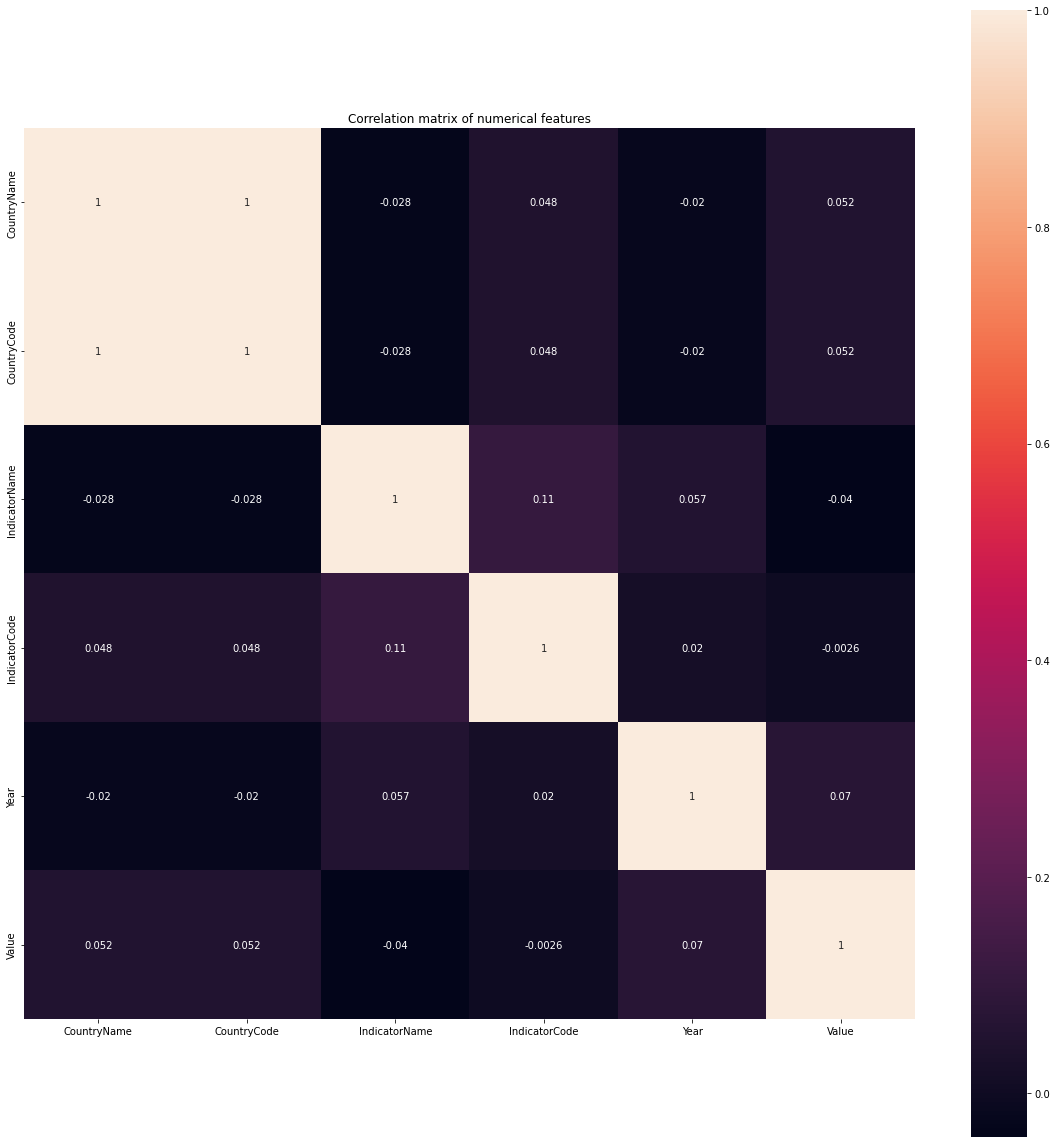

In [42]:
corr = data.corr() #perform correlation between all continous features
plt.subplots(figsize=(16,16));
sns.heatmap(corr, annot=True, square=True) #plotting heatmap of correlations
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

<AxesSubplot:>

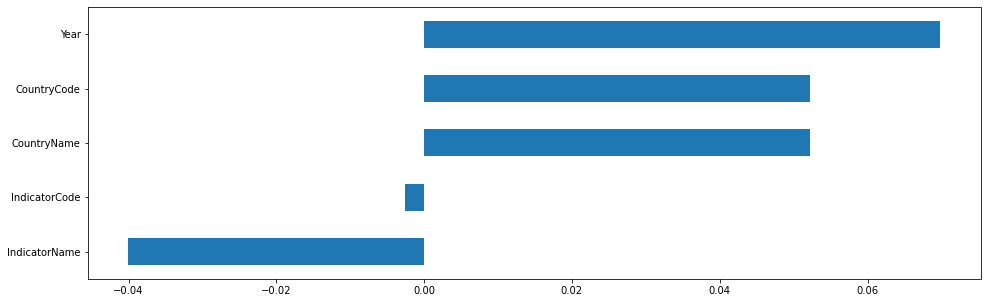

In [43]:
plt.figure(figsize=(16,5))
corr["Value"].sort_values(ascending=True)[:-1].plot(kind="barh")

In [44]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,0,0,40,1181,1960,1.335609e+02
1,0,0,44,1204,1960,8.779760e+01
2,0,0,45,1205,1960,6.634579e+00
3,0,0,46,1206,1960,8.102333e+01
4,0,0,86,636,1960,3.000000e+06


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117472 entries, 0 to 5655835
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CountryName    117472 non-null  int32  
 1   CountryCode    117472 non-null  int32  
 2   IndicatorName  117472 non-null  int32  
 3   IndicatorCode  117472 non-null  int32  
 4   Year           117472 non-null  int64  
 5   Value          117472 non-null  float64
dtypes: float64(1), int32(4), int64(1)
memory usage: 4.5 MB


In [46]:
x = data.drop(['Value','IndicatorCode'],axis=1) #independet features
x=pd.DataFrame(x)
y = data['Value'] #dependent feature
y=pd.DataFrame(y)

In [47]:
x.head()

,CountryName,CountryCode,IndicatorName,Year
0,0,0,40,1960
1,0,0,44,1960
2,0,0,45,1960
3,0,0,46,1960
4,0,0,86,1960


In [48]:
y.head()

,Value
0,1.335609e+02
1,8.779760e+01
2,6.634579e+00
3,8.102333e+01
4,3.000000e+06


In [49]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,0,0,40,1181,1960,1.335609e+02
1,0,0,44,1204,1960,8.779760e+01
2,0,0,45,1205,1960,6.634579e+00
3,0,0,46,1206,1960,8.102333e+01
4,0,0,86,636,1960,3.000000e+06


In [50]:
type(x)

pandas.core.frame.DataFrame

In [51]:
type(y)

pandas.core.frame.DataFrame

In [52]:
data['CountryCode'].unique()

array([0, 1, 2, 3, 4])

In [53]:
data.shape

(117472, 6)

In [54]:
data["CountryCode"].unique()

array([0, 1, 2, 3, 4])

In [55]:
data['CountryName'].unique()

array([0, 1, 2, 3, 4])

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)


(93977, 4)
(23495, 4)


In [57]:
from sklearn.ensemble import RandomForestRegressor
rand=RandomForestRegressor(n_estimators=10,random_state=52)
rand.fit(x_train,y_train)


C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10, random_state=52)

In [58]:
x_test

,CountryName,CountryCode,IndicatorName,Year
5453593,2,2,1136,2013
360344,0,0,788,1971
4208247,2,2,339,2006
2958287,2,2,750,1998
2748752,4,4,312,1996
...,...,...,...,...
5585649,2,2,937,2014
1876725,4,4,754,1989
821618,2,2,713,1977
532921,2,2,375,1973


In [59]:
from collections import Counter as c
c(data["CountryCode"])


Counter({0: 17115, 1: 17611, 2: 35721, 3: 22600, 4: 24425})

In [60]:
c(data["CountryName"])


Counter({0: 17115, 1: 17611, 2: 35721, 3: 22600, 4: 24425})

In [61]:
ypred=rand.predict(x_test)
print(ypred)

[6.82930000e+01 6.09080000e+07 2.89038983e+01 ... 1.64370676e+10
 8.87279335e+09 9.74340000e+01]


In [62]:
y_test

,Value
5453593,6.800600e+01
360344,6.744000e+07
4208247,2.226165e+01
2958287,1.926160e+01
2748752,1.970370e+00
...,...
5585649,1.417129e+09
1876725,1.392817e+00
821618,1.755728e+10
532921,1.005420e+10


In [63]:
rand.score(x_train,y_train)

0.9952680652781151

In [64]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,0,0,40,1181,1960,1.335609e+02
1,0,0,44,1204,1960,8.779760e+01
2,0,0,45,1205,1960,6.634579e+00
3,0,0,46,1206,1960,8.102333e+01
4,0,0,86,636,1960,3.000000e+06


In [65]:
import pickle
pickle.dump(rand,open("co2.pickle","wb"))

In [67]:
yp = rand.predict([[2,2,1181,1960]])
yp

array([38.36676461])